In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

%matplotlib inline

In [2]:
# Pandas setting
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# Load necessary data files for analize
sellers = pd.read_csv('sellers_1.csv')
order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
translate_category = pd.read_csv('product_category_name_translation.csv')

In [4]:
# Просмотр размерностей данных
sellers.shape, order_items.shape, orders.shape, products.shape

((3095, 4), (112650, 7), (99441, 8), (32951, 9))

In [5]:
# Объединение всех данных в единую таблицу
data_sellers_and_orders = pd.merge(sellers, order_items, how='left', on='seller_id')
full_data = pd.merge(data_sellers_and_orders, orders, how='left', on='order_id')
full_data = pd.merge(full_data, products, how='left', on='product_id')
full_data = pd.merge(full_data, translate_category, how='left', on='product_category_name')

In [6]:
full_data.shape

(112650, 26)

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_zip_code_prefix         112650 non-null  int64  
 2   seller_city                    112650 non-null  object 
 3   seller_state                   112650 non-null  object 
 4   order_id                       112650 non-null  object 
 5   order_item_id                  112650 non-null  int64  
 6   product_id                     112650 non-null  object 
 7   shipping_limit_date            112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

Присутствуют пропуски значений

In [8]:
full_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,9d6837f9700a3441e7183bff3bc4eef0,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01 00:00:00,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0,sports_leisure
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,a973c4e3ad82777add3fa188f91dacea,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30 00:00:00,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0,sports_leisure
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,1554ffe702931a062b4383b109accf63,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0,sports_leisure
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,9facbfd2dd51a45404d58154b12ed2dd,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04 00:00:00,malas_acessorios,21.0,769.0,4.0,1600.0,55.0,37.0,30.0,luggage_accessories
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,4e2c1f15de98416a90c2ee06b55ccc9b,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03 00:00:00,papelaria,30.0,832.0,5.0,2000.0,25.0,55.0,40.0,stationery


In [9]:
full_data.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'order_id', 'order_item_id', 'product_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [10]:
# Фильтр ненужных колонок
non_value_columns = ['product_name_lenght',
                        'product_description_lenght',
                        'product_photos_qty', 
                        'product_weight_g', 
                        'product_length_cm',
                        'product_height_cm', 
                        'product_width_cm',
                        'seller_zip_code_prefix',
                        'customer_id',
                        ]
full_data = full_data.drop(non_value_columns, axis=1)

In [11]:
full_data.describe().round(2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


In [12]:
full_data.columns

Index(['seller_id', 'seller_city', 'seller_state', 'order_id', 'order_item_id',
       'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_category_name_english'],
      dtype='object')

In [13]:
# В одном заказе могут быть несколько продуктов. Просмотр одного из таких заказов
# Видно, что в 1 заказе с несколькоми товарами продавцы могут быть разные
full_data[full_data['order_id'] == 'bc8a5de6abf5b14f98a6135a7fb46731']

,seller_id,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english
2,3442f8959a84dea7ee197c632cb2df15,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.8,2.42,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,esporte_lazer,sports_leisure
88524,8c16d1f32a54d92897cc437244442e1b,blumenau,SC,bc8a5de6abf5b14f98a6135a7fb46731,1,1b37d55343061aa2b18b807945ff9831,2017-09-05 12:50:19,118.9,26.68,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20 00:00:00,moveis_escritorio,office_furniture


In [14]:
# rearrange all the columns for easy reference
df_sellers_analize = full_data[['seller_id', 
                                'seller_city', 
                                'seller_state', 
                                'product_category_name_english',
                                'price', 'order_status', 
                                'freight_value', 
                                'order_delivered_customer_date', 
                                'order_id',
                                'order_item_id',
                                'product_id', 'order_purchase_timestamp']]

In [15]:
df_sellers_analize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   seller_id                      112650 non-null  object 
 1   seller_city                    112650 non-null  object 
 2   seller_state                   112650 non-null  object 
 3   product_category_name_english  111023 non-null  object 
 4   price                          112650 non-null  float64
 5   order_status                   112650 non-null  object 
 6   freight_value                  112650 non-null  float64
 7   order_delivered_customer_date  110196 non-null  object 
 8   order_id                       112650 non-null  object 
 9   order_item_id                  112650 non-null  int64  
 10  product_id                     112650 non-null  object 
 11  order_purchase_timestamp       112650 non-null  object 
dtypes: float64(2), int64(1), objec

In [16]:
# Просмотр уникальных значений городов. Нужно чистить данные
df_sellers_analize['seller_city'].unique()

array(['campinas', 'mogi guacu', 'rio de janeiro', 'sao paulo',
       'braganca paulista', 'brejao', 'penapolis', 'curitiba', 'anapolis',
       'itirapina', 'tubarao', 'lauro de freitas', 'imbituba', 'brasilia',
       'porto seguro', 'guaruja', 'tabatinga', 'salto', 'tres de maio',
       'belo horizonte', 'arapongas', 'sao bernardo do campo', 'tatui',
       'garopaba', 'camanducaia', 'tupa', 'guarulhos',
       'sao jose dos pinhais', 'sao ludgero', 'sao jose', 'piracicaba',
       'porto alegre', 'congonhal', 'santo andre', 'osasco', 'valinhos',
       'joinville', 'saquarema', 'barra velha', 'petropolis',
       'santo antonio da patrulha', 'ponta grossa', 'santana de parnaiba',
       'sao carlos', 'ibitinga', 'barueri', 'caxias do sul', 'araguari',
       'contagem', 'jaragua do sul', 'lages - sc', 'bento goncalves',
       'catanduva', 'ribeirao pires', 'jaboticabal', 'echapora', 'cotia',
       'rio do sul', 'sorocaba', 'pradopolis', 'itaborai', 'mirassol',
       'birigui',

In [17]:
# Просмотр уникальных значений районов продавцов
df_sellers_analize['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

In [18]:
# check missing values for each column 
df_sellers_analize.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2454
product_category_name_english    1627
seller_id                           0
seller_city                         0
seller_state                        0
price                               0
order_status                        0
freight_value                       0
order_id                            0
order_item_id                       0
product_id                          0
order_purchase_timestamp            0
dtype: int64

### Cleaning data

In [19]:
# clean seller_city from wrong characters
df_sellers_analize['seller_city'] = df_sellers_analize['seller_city'].str.split(r'\\|,|/|\(|\-').str[0].str.strip()

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# collect only delivered, shipped and invoiced orders
df_sellers_analize = df_sellers_analize[df_sellers_analize['order_status'].isin(['delivered', 'shipped', 'invoiced'])]

In [21]:
# Очистка от дубиликатов строк и пустых значений 
df_sellers_analize = df_sellers_analize.drop_duplicates()
df_sellers_analize = df_sellers_analize.dropna().reset_index(drop=True)

In [22]:
df_sellers_analize.shape

(108630, 12)

In [23]:
df_sellers_analize.columns

Index(['seller_id', 'seller_city', 'seller_state',
       'product_category_name_english', 'price', 'order_status',
       'freight_value', 'order_delivered_customer_date', 'order_id',
       'order_item_id', 'product_id', 'order_purchase_timestamp'],
      dtype='object')

In [24]:
# check missing values for each column 
df_sellers_analize.isnull().sum().sort_values(ascending=False)

seller_id                        0
seller_city                      0
seller_state                     0
product_category_name_english    0
price                            0
order_status                     0
freight_value                    0
order_delivered_customer_date    0
order_id                         0
order_item_id                    0
product_id                       0
order_purchase_timestamp         0
dtype: int64

In [25]:
df_sellers_analize['timestamp'] = pd.to_datetime(df_sellers_analize['order_purchase_timestamp'])

In [26]:
df_sellers_analize['timestamp'].max(), df_sellers_analize['timestamp'].min()

(Timestamp('2018-08-29 15:00:37'), Timestamp('2016-09-15 12:16:38'))

In [27]:
# Add the columns - Month, Day and Hour for the invoice¶
df_sellers_analize.insert(loc=2, column='year_month', value=df_sellers_analize['timestamp'].map(lambda x: 100*x.year + x.month))
df_sellers_analize.insert(loc=3, column='month', value=df_sellers_analize['timestamp'].dt.month)
# +1 to make Monday=1.....until Sunday=7
df_sellers_analize.insert(loc=4, column='day', value=(df_sellers_analize['timestamp'].dt.dayofweek)+1)
df_sellers_analize.insert(loc=5, column='hour', value=df_sellers_analize['timestamp'].dt.hour)
df_sellers_analize.head()

,seller_id,seller_city,year_month,month,day,hour,seller_state,product_category_name_english,price,order_status,freight_value,order_delivered_customer_date,order_id,order_item_id,product_id,order_purchase_timestamp,timestamp
0,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,1,20,SP,sports_leisure,106.20,delivered,9.56,2017-08-30 16:07:13,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-21 20:35:44,2017-08-21 20:35:44
1,3442f8959a84dea7ee197c632cb2df15,campinas,201705,5,5,16,SP,sports_leisure,101.70,delivered,15.92,2017-06-02 16:57:44,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-05 16:12:29,2017-05-05 16:12:29
2,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,3,11,SP,sports_leisure,10.80,delivered,2.42,2017-09-01 16:51:26,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-08-30 11:47:52,2017-08-30 11:47:52
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201711,11,5,16,SP,luggage_accessories,89.99,delivered,45.09,2017-11-21 23:26:35,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-10 16:54:13,2017-11-10 16:54:13
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201709,9,4,19,SP,stationery,199.90,delivered,21.89,2017-10-06 17:03:59,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-09-28 19:31:57,2017-09-28 19:31:57


In [28]:
df_sellers_analize.shape

(108630, 17)

### Best | worst sellers analize

### Агрегация продавцов по категории продуктов (количество и оборот)

In [ ]:
orders_by_cellers = df_sellers_analize.groupby(['seller_id', 'product_category_name_english'], as_index=False) \
        .agg({'order_id': 'count', 'price': 'sum'}) \
        .rename(columns={'order_id': 'num_orders', 'price': 'money_turnover'}) \
        .sort_values(by=['money_turnover', 'num_orders'], ascending=[False, True])

orders_by_cellers.head()

In [ ]:
sellers_income = df_sellers_analize.groupby('seller_id', as_index=False)['price'].sum(). \
                rename(columns={'price': 'sum_income'}). \
                sort_values(by=['sum_income'], ascending=False, ignore_index=True)

sellers_income.head()

In [ ]:
top5_sellers_income = sellers_income.iloc[:5, 0].tolist()

In [ ]:
orders_by_cellers[orders_by_cellers['seller_id'].isin(top5_sellers_income)].reset_index(drop=True)

In [ ]:
# Сохранение файлов с топ 5 продавцами
top5 = {name: pd.DataFrame() for name in top5_sellers_income}
for index, seller in enumerate (top5_sellers_income):
    top5[seller] = orders_by_cellers[orders_by_cellers['seller_id'] == seller].reset_index(drop=True)
    top5[seller].to_csv(os.path.join(os.getcwd(), 'result_datas', f'top{index+1}_seller.tsv'), sep='\t', decimal=',')

#### Первоначальный анализ продавцов по количеству продаж

In [ ]:
orders_count = df_sellers_analize.groupby('seller_id', as_index=False)['order_id'].count()

In [ ]:
orders_count.head()

In [ ]:
# Сортировка значений
orders_count = orders_count.rename(columns={'order_id': 'num_orders'}). \
    sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [ ]:
# График лидеров продаж по количеству
plt.subplots(figsize=(15, 6))
plt.bar(orders_count[orders_count['num_orders'] > 1000]['seller_id'],
        orders_count[orders_count['num_orders'] > 1000]['num_orders'])
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.title('Лидеры по объемам продаж')
plt.show()

In [ ]:
orders_count.head()

In [ ]:
# Собираем топ5 и топ10 продавцов
top5_sellers = orders_count.iloc[:5, 0].tolist()
top10_sellers = orders_count.iloc[:10, 0].tolist()

In [ ]:
orders_count[orders_count['num_orders'] > 1000].shape[0]

In [ ]:
# plt.subplots(figsize=(15,6))
# plt.plot(orders_count['seller_id'], orders_count['num_orders'])
# plt.xlabel('Customers ID')
# plt.xticks(rotation=90)
# plt.ylabel('Number of Orders')
# plt.title('Number of Orders for different Customers')
# plt.show()

#### Полезно посмотреть не по количеству продаж, а по доходу

In [ ]:
sellers_income = df_sellers_analize.groupby('seller_id', as_index=False)['price'].sum(). \
                rename(columns={'price': 'sum_income'}). \
                sort_values(by=['sum_income'], ascending=False, ignore_index=True)

In [ ]:
sellers_income.head(25)

In [ ]:
(sellers_income['sum_income'] < 100).sum()

In [ ]:
top5_best_sellers = sellers_income.iloc[:5, 0].tolist()
top10_best_sellers = sellers_income.iloc[:10, 0].tolist()

In [ ]:
plt.subplots(figsize=(15, 6))
plt.bar(sellers_income[sellers_income['sum_income'] > 50000]['seller_id'],
        sellers_income[sellers_income['sum_income'] > 50000]['sum_income'])
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
plt.ylabel('Сумма оборота')
plt.title('Лидеры по обороту')
plt.show()

In [ ]:
sellers_income.iloc[:5, :].to_csv(os.path.join(os.getcwd(), 'result_datas', 'top5_sellers_income.tsv'), 
                                  sep='\t', 
                                  decimal=',')

In [ ]:
sellers_income[sellers_income['sum_income'] > 50000].to_csv(os.path.join(os.getcwd(), 'result_datas', 'best_sellers_income.tsv'), 
                                  sep='\t', 
                                  decimal=',')

In [ ]:
sellers50000 = sellers_income[sellers_income['sum_income'] > 50000]['seller_id'].to_list()

In [ ]:
sellers50000_quantity = orders_count[orders_count['seller_id'].isin(sellers50000)].reset_index(drop=True)
timedelta = (df_sellers_analize['timestamp'].max() - df_sellers_analize['timestamp'].min()).days
sellers50000_quantity['order_quantity'] = (sellers50000_quantity['num_orders'] / timedelta).round(2)
sorterIndex = dict(zip(sellers50000, range(len(sellers50000))))
sellers50000_quantity['sort_column'] = sellers50000_quantity['seller_id'].map(sorterIndex)
sellers50000_quantity = sellers50000_quantity.sort_values(by=['sort_column']).reset_index(drop=True)
sellers50000_quantity = sellers50000_quantity.drop('sort_column', axis=1)

In [ ]:
sellers50000_quantity = pd.merge(sellers50000_quantity, sellers_income[sellers_income['sum_income'] > 50000], how='left', on='seller_id')

In [ ]:
sellers50000_quantity.head()

In [ ]:
sellers50000_quantity.to_csv(os.path.join(os.getcwd(), 'result_datas', 'best_sellers_income_quantity.tsv'), 
                                  sep='\t', 
                                  decimal=',')

In [ ]:
plt.subplots(figsize=(15, 6))
plt.bar(sellers50000_quantity['seller_id'],
        sellers50000_quantity['order_quantity'])
plt.xlabel('Seller ID')
plt.xticks(rotation=90)
plt.ylabel('Частота оборота')
plt.title('Лидеры по обороту')
plt.show()

### Анализ аутсайдеров за последние полгода по дате последней транзакии

In [ ]:
sellers_last_half_of_year = df_sellers_analize[df_sellers_analize['year_month'] >= 201802].reset_index(drop=True)
sellers_last_half_of_year.head()

In [ ]:
# sellers_income = df_sellers_analize.groupby('seller_id', as_index=False)['price'].sum(). \
#                 rename(columns={'price': 'sum_income'}). \
#                 sort_values(by=['sum_income'], ascending=False, ignore_index=True)

lowest_sellers = sellers_income[sellers_income['sum_income'] < 100].reset_index(drop=True)

In [ ]:
lowest_list_sellers = lowest_sellers['seller_id'].to_list()

In [ ]:
lowest_sellers_last_6months = sellers_last_half_of_year[sellers_last_half_of_year['seller_id'].isin(lowest_list_sellers)].reset_index(drop=True)

In [ ]:
lowest_sellers_last_6months['seller_id'].unique()

In [ ]:
lowest_sellers_last_6months['year_month'].min(), lowest_sellers_last_6months['year_month'].max()

In [ ]:
lowest_sellers_last_3months = lowest_sellers_last_6months[lowest_sellers_last_6months['year_month'] > 201805].reset_index(drop=True)

In [ ]:
last_3months_grouped = lowest_sellers_last_3months.groupby('seller_id').agg({'order_id': 'count', 'price': 'sum'}) \
                            .rename(columns={'order_id': 'num_orders', 'price': 'sum_income'}) \
                            .sort_values(by=['sum_income', 'num_orders'], ascending=[False, True]) \
                            .reset_index()

In [ ]:
lowest_sellers_last_3months = pd.merge(lowest_sellers_last_3months, last_3months_grouped, how='left', on='seller_id')

In [ ]:
lowest_sellers_last_3months.columns

In [ ]:
lowest_sellers_last_3months.boxplot(column=['num_orders', 'sum_income'])

In [ ]:
latest_idx_time = lowest_sellers_last_3months.groupby('seller_id')['timestamp'].idxmax()
# latest_idx_time['type'] = 'last_date_of_sell'

In [ ]:
latest_idx_time[0].index

In [ ]:
last_date_of_sell = lowest_sellers_last_3months.iloc[
    lowest_sellers_last_3months.groupby(['seller_id']).apply(lambda x: x['timestamp'].idxmax())]

In [ ]:
last_date_of_sell.groupby('month').agg({'seller_id': 'count'}).rename(
    columns={'seller_id': 'num_sellers'}).reset_index()

In [ ]:
last_date_of_sell.drop(columns=['product_id', 'order_item_id', 'order_id', 'order_purchase_timestamp',
                       'hour', 'order_status', 'freight_value', 'price', 'day'], inplace=True)

In [ ]:
last_date_of_sell = last_date_of_sell.sort_values(
    by=['sum_income', 'month'], ascending=False).reset_index(drop=True)

In [ ]:
last_date_of_sell['date_of_last_order'] = last_date_of_sell['timestamp'].dt.date

In [ ]:
last_date_of_sell = last_date_of_sell.drop(
    ['date', 'timestamp', 'order_delivered_customer_date'], axis=1)

In [ ]:
last_date_of_sell.head()

In [ ]:
last_date_of_sell.to_csv(os.path.join(os.getcwd(), 'result_datas', 'lowest_sellers_last_3months_date.tsv'),
                         sep='\t',
                         decimal=',')

#### Продавцы, которые продали товаров меньше 100 товаров

In [ ]:
orders_count[orders_count['num_orders'] < 100].shape

In [ ]:
orders_count[orders_count['num_orders'] == 1].shape

In [ ]:
outsider_sellers = orders_count[orders_count['num_orders'] < 100].reset_index(
    drop=True)

In [ ]:
outsider_sellers.head()

In [ ]:
count_outsider_sellers_by_orders = outsider_sellers.groupby('num_orders'). \
    count().reset_index().rename(columns={'seller_id': 'num_sellers'})

In [ ]:
count_outsider_sellers_by_orders.shape

In [ ]:
plt.subplots(figsize=(15, 6))
plt.bar(count_outsider_sellers_by_orders['num_orders'],
        count_outsider_sellers_by_orders['num_sellers'])
plt.xlabel('Number of Orders')
plt.xticks(rotation=90)
plt.ylabel('Number of Sellers')
plt.title('Срез продавцов по наименьшим продажам')
plt.show()

Интересно увидеть диаграмму доходов топ 5 продавцов, в разрезе категорий (с) Заказчик

# RFM-analisys

In [32]:
df = df_sellers_analize.drop(columns=['order_item_id',
                                      'product_id',
                                      'order_delivered_customer_date',
                                      'freight_value',
                                      'order_status',
                                      'order_purchase_timestamp'])
df['timestamp'] = df['timestamp'].dt.date
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,seller_id,seller_city,year_month,month,day,hour,seller_state,product_category_name_english,price,order_id,timestamp
0,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,1,20,SP,sports_leisure,106.20,4a90af3e85dd563884e2afeab1091394,2017-08-21
1,3442f8959a84dea7ee197c632cb2df15,campinas,201705,5,5,16,SP,sports_leisure,101.70,6d953888a914b67350d5bc4d48f2acab,2017-05-05
2,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,3,11,SP,sports_leisure,10.80,bc8a5de6abf5b14f98a6135a7fb46731,2017-08-30
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201711,11,5,16,SP,luggage_accessories,89.99,035201c3c82a97f8a25dd6bd5244b2d5,2017-11-10
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201709,9,4,19,SP,stationery,199.90,0504447548229e075dea8441b37b1e2a,2017-09-28


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108630 entries, 0 to 108629
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   seller_id                      108630 non-null  object        
 1   seller_city                    108630 non-null  object        
 2   year_month                     108630 non-null  int64         
 3   month                          108630 non-null  int64         
 4   day                            108630 non-null  int64         
 5   hour                           108630 non-null  int64         
 6   seller_state                   108630 non-null  object        
 7   product_category_name_english  108630 non-null  object        
 8   price                          108630 non-null  float64       
 9   order_id                       108630 non-null  object        
 10  timestamp                      108630 non-null  datetime64[ns]
dtype

In [34]:
df['timestamp'].max()

Timestamp('2018-08-29 00:00:00')

In [36]:
import datetime as dt
last_day = df['timestamp'].max()  # last date available in our dataset
threshold_date = dt.datetime(2017, 8, 29)

In [44]:
# # restrict the data to one full year because it's better to use a metric per Months or Years in RFM
# sellers_last_year = df[df['timestamp'] >=
#                        threshold_date].reset_index(drop=True)
# sellers_last_year.shape

In [43]:
# print("Summary..")
# # exploring the unique values of each attribute
# print("Number of sellers:", sellers_last_year['seller_id'].nunique())
# print("Percentage of sellers NA: ", round(
#     sellers_last_year['seller_id'].isnull().sum() * 100 / len(sellers_last_year), 2), "%")

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.


    RECENCY (R): Days since last purchase
    FREQUENCY (F): Total number of purchases
    MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

In [42]:
# present day is equal last day
df['hist'] = last_day - df['timestamp']
df['hist'].astype('timedelta64[D]')
df['hist'] = df['hist'] / np.timedelta64(1, 'D')
df.head()

,seller_id,seller_city,year_month,month,day,hour,seller_state,product_category_name_english,price,order_id,timestamp,hist
0,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,1,20,SP,sports_leisure,106.20,4a90af3e85dd563884e2afeab1091394,2017-08-21,373.0
1,3442f8959a84dea7ee197c632cb2df15,campinas,201705,5,5,16,SP,sports_leisure,101.70,6d953888a914b67350d5bc4d48f2acab,2017-05-05,481.0
2,3442f8959a84dea7ee197c632cb2df15,campinas,201708,8,3,11,SP,sports_leisure,10.80,bc8a5de6abf5b14f98a6135a7fb46731,2017-08-30,364.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201711,11,5,16,SP,luggage_accessories,89.99,035201c3c82a97f8a25dd6bd5244b2d5,2017-11-10,292.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,201709,9,4,19,SP,stationery,199.90,0504447548229e075dea8441b37b1e2a,2017-09-28,335.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108630 entries, 0 to 108629
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   seller_id                      108630 non-null  object        
 1   seller_city                    108630 non-null  object        
 2   year_month                     108630 non-null  int64         
 3   month                          108630 non-null  int64         
 4   day                            108630 non-null  int64         
 5   hour                           108630 non-null  int64         
 6   seller_state                   108630 non-null  object        
 7   product_category_name_english  108630 non-null  object        
 8   price                          108630 non-null  float64       
 9   order_id                       108630 non-null  object        
 10  timestamp                      108630 non-null  datetime64[ns]
 11  

In [47]:
# Create rfmTable

rfmTable = df.groupby('seller_id').agg({'hist': lambda x: x.min(),  # Recency
                                        'seller_id': lambda x: len(x),  # Frequency
                                        'price': lambda x: x.sum()})  # Monetary Value

rfmTable.rename(columns={'hist': 'recency',
                         'seller_id': 'frequency',
                         'price': 'monetary_value'}, inplace=True)

In [48]:
rfmTable.head()

,recency,frequency,monetary_value
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,315.0,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,48.0,234,24487.03
002100f778ceb8431b7a1020ff7ab48f,139.0,54,1216.60
004c9cd9d87a3c30c522c48c4fc07416,120.0,156,17698.71
00720abe85ba0859807595bbf045a33b,26.0,26,1007.50


In [49]:
rfmTable.shape

(2912, 3)

In [50]:
df[df['seller_id'] == '0015a82c2db000af6aaaf3ae2ecb0532']

,seller_id,seller_city,year_month,month,day,hour,seller_state,product_category_name_english,price,order_id,timestamp,hist
104108,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,201710,10,3,8,SP,small_appliances,895.0,7f39ba4c9052be115350065d07583cac,2017-10-18,315.0
104109,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,201710,10,4,13,SP,small_appliances,895.0,9dc8d1a6f16f1b89874c29c9d8d30447,2017-10-12,321.0
104110,0015a82c2db000af6aaaf3ae2ecb0532,santo andre,201709,9,2,22,SP,small_appliances,895.0,d455a8cb295653b55abda06d434ab492,2017-09-26,337.0


In [51]:
# RFM analysis involves categorising R,F and M into 3 or more categories. 
# Let's create 4 categories based on quartiles 
# (quartiles roughly divide the sample into 4 segments equal proportion).

quartiles = rfmTable.quantile(q=[0.25, 0.50, 0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25    13.00        2.0        219.8000
0.50    41.00        8.0        849.5000
0.75   195.25       26.0       3538.4475 <class 'pandas.core.frame.DataFrame'>


In [52]:
quartiles = quartiles.to_dict()
quartiles

{'recency': {0.25: 13.0, 0.5: 41.0, 0.75: 195.25},
 'frequency': {0.25: 2.0, 0.5: 8.0, 0.75: 26.0},
 'monetary_value': {0.25: 219.8, 0.5: 849.5, 0.75: 3538.4475}}

In [53]:
# for Recency
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


# for Frequency and Monetary value
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [54]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(
    RClass, args=('recency', quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(
    FMClass, args=('frequency', quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(
    FMClass, args=('monetary_value', quartiles,))

In [135]:
rfmSeg['FMClass'] = rfmSeg.F_Quartile.map(str) \
    + rfmSeg.M_Quartile.map(str)

In [ ]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
    + rfmSeg.F_Quartile.map(str) \
    + rfmSeg.M_Quartile.map(str)

In [136]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,SellerID,RFM_Level,FMClass
seller_id,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,315.0,3,2685.00,4,3,2,432,9,0015a82c2db000af6aaaf3ae2ecb0532,Worst Sellers,32
001cca7ae9ae17fb1caed9dfb1094831,48.0,234,24487.03,3,1,1,311,5,001cca7ae9ae17fb1caed9dfb1094831,Best Sellers,11
002100f778ceb8431b7a1020ff7ab48f,139.0,54,1216.60,3,1,2,312,6,002100f778ceb8431b7a1020ff7ab48f,Potential,12
004c9cd9d87a3c30c522c48c4fc07416,120.0,156,17698.71,3,1,1,311,5,004c9cd9d87a3c30c522c48c4fc07416,Best Sellers,11
00720abe85ba0859807595bbf045a33b,26.0,26,1007.50,2,2,2,222,6,00720abe85ba0859807595bbf045a33b,Potential,22


In [58]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
seller_id,,,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,5.0,1148,226987.93,1,1,1,111
53243585a1d6dc2643021fd1853d8905,8.0,400,217940.44,1,1,1,111
4a3ca9315b744ce9f8e9374361493884,2.0,1949,196882.12,1,1,1,111
fa1c13f2614d7b5c4749cbc52fecda94,0.0,579,190917.14,1,1,1,111
da8622b14eb17ae2831f4ac5b9dab84a,1.0,1548,159816.87,1,1,1,111
...,...,...,...,...,...,...,...
344223b2a90784f64136a8a5da012e7f,224.0,1,10.90,4,4,4,444
c18309219e789960add0b2255ca4b091,267.0,1,9.90,4,4,4,444
0f94588695d71662beec8d883ffacf09,546.0,1,9.00,4,4,4,444


In [123]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean().sort_values(ascending=False)

RFMClass
111    20386.837666
311    16593.388488
211    14643.432117
411     9355.228400
421     8650.792857
321     8011.563462
121     7585.111071
331     7125.475000
221     6786.530244
241     6729.000000
231     6468.193333
431     5819.696154
341     5598.000000
441     5189.225000
131     4965.490000
312     2475.369667
212     2310.599487
112     2283.183889
412     2118.791818
322     1827.456333
222     1827.170091
122     1800.884000
422     1611.288519
332     1552.601379
442     1552.328000
232     1546.905455
242     1437.624444
432     1429.612800
132     1408.981304
342     1381.106429
142     1155.176000
113      807.222500
313      694.900000
223      596.270702
123      591.528772
323      580.166279
423      517.675263
333      500.771398
133      486.863380
233      477.859574
413      455.033333
433      426.435481
243      419.777931
343      417.283469
443      402.506515
143      372.804737
424      187.096667
124      164.733333
224      163.376667
134      14

In [124]:
def rfm_level(df):
    if (0 < df['R_Quartile'] < 4 and df['F_Quartile'] == 1 and df['M_Quartile'] == 1):
        return 'Best Sellers'
    elif df['R_Quartile'] == 4:
        return 'Worst Sellers'
    elif df['M_Quartile'] == 1:
        return 'Loyal Sellers'
    elif df['M_Quartile'] == 2:
        return 'Potential'
    else:
        return 'Others'

In [63]:
# Total Score values are between 3 and 12
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + \
    rfmSeg['F_Quartile'] + rfmSeg['M_Quartile']
display(rfmSeg.head()) 
print(rfmSeg.info())

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
seller_id,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,315.0,3,2685.00,4,3,2,432,9
001cca7ae9ae17fb1caed9dfb1094831,48.0,234,24487.03,3,1,1,311,5
002100f778ceb8431b7a1020ff7ab48f,139.0,54,1216.60,3,1,2,312,6
004c9cd9d87a3c30c522c48c4fc07416,120.0,156,17698.71,3,1,1,311,5
00720abe85ba0859807595bbf045a33b,26.0,26,1007.50,2,2,2,222,6


<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 0015a82c2db000af6aaaf3ae2ecb0532 to ffff564a4f9085cd26170f4732393726
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         2912 non-null   float64
 1   frequency       2912 non-null   int64  
 2   monetary_value  2912 non-null   float64
 3   R_Quartile      2912 non-null   int64  
 4   F_Quartile      2912 non-null   int64  
 5   M_Quartile      2912 non-null   int64  
 6   RFMClass        2912 non-null   object 
 7   Total Score     2912 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 204.8+ KB
None


In [126]:
rfmSeg['RFM_Level'] = rfmSeg.apply(rfm_level, axis=1)

In [127]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,SellerID,RFM_Level
seller_id,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,315.0,3,2685.00,4,3,2,432,9,0015a82c2db000af6aaaf3ae2ecb0532,Worst Sellers
001cca7ae9ae17fb1caed9dfb1094831,48.0,234,24487.03,3,1,1,311,5,001cca7ae9ae17fb1caed9dfb1094831,Best Sellers
002100f778ceb8431b7a1020ff7ab48f,139.0,54,1216.60,3,1,2,312,6,002100f778ceb8431b7a1020ff7ab48f,Potential
004c9cd9d87a3c30c522c48c4fc07416,120.0,156,17698.71,3,1,1,311,5,004c9cd9d87a3c30c522c48c4fc07416,Best Sellers
00720abe85ba0859807595bbf045a33b,26.0,26,1007.50,2,2,2,222,6,00720abe85ba0859807595bbf045a33b,Potential


<AxesSubplot:xlabel='RFM_Level', ylabel='SellerID'>

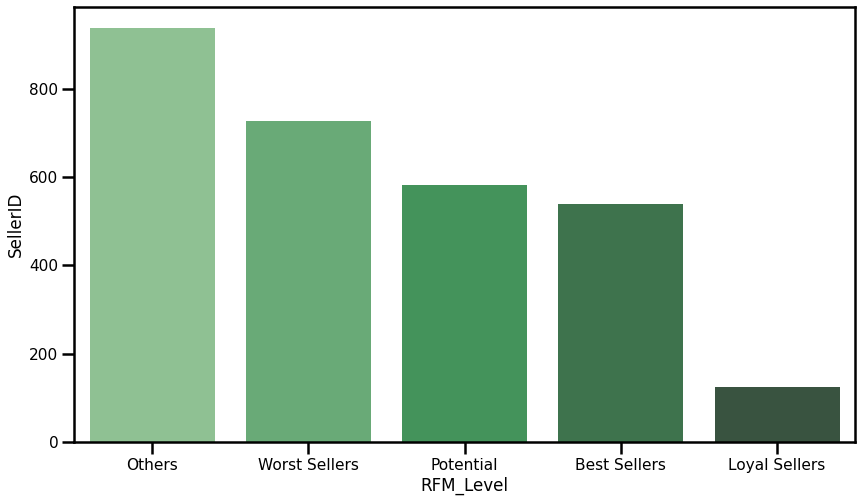

In [130]:
# We are going to do a small visualization of our segments
sq1 = rfmSeg.groupby('RFM_Level')['SellerID'].nunique() \
            .sort_values(ascending=False).reset_index()
plt.figure(figsize=(14, 8))
# sq1.drop([0], inplace=True)
sns.barplot(data=sq1, x='RFM_Level', y='SellerID', palette='Greens_d')

In [137]:
rfmSeg.to_csv(os.path.join(os.getcwd(), 'result_datas', 'rfmTable.tsv'), 
                                  sep='\t', 
                                  decimal=',')

In [106]:
rfmSeg[rfmSeg['RFMClass'] == '111'].sort_values(
    'monetary_value', ascending=False).head(5)
rfmSeg['SellerID'] = pd.Series(rfmSeg.index.values, index=rfmSeg.index)
# print(rfmSeg)

In [115]:
sellerSegmentation = rfmSeg.groupby('RFMClass').agg(
    {'RFMClass': lambda x: len(x), 'monetary_value': lambda x: sum(x)})
sellerSegmentation.rename(
    columns={'RFMClass': 'ClassName', 'monetary_value': 'MonetaryValue'}, inplace=True)

In [116]:
print('Summary..')
print('Number of groups: ', sellerSegmentation.shape[0])
print('Group names: ', sellerSegmentation.index.values)

Summary..
Number of groups:  57
Group names:  ['111' '112' '113' '121' '122' '123' '124' '131' '132' '133' '134' '142'
 '143' '144' '211' '212' '221' '222' '223' '224' '231' '232' '233' '234'
 '241' '242' '243' '244' '311' '312' '313' '321' '322' '323' '331' '332'
 '333' '334' '341' '342' '343' '344' '411' '412' '413' '421' '422' '423'
 '424' '431' '432' '433' '434' '441' '442' '443' '444']


In [117]:
sellerSegmentation['RFMClass'] = pd.Series(
    sellerSegmentation.index.values, index=sellerSegmentation.index)
display(sellerSegmentation)

,ClassName,MonetaryValue,RFMClass
RFMClass,,,
111,317,6462627.54,111
112,54,123291.93,112
113,4,3228.89,113
121,28,212383.11,121
122,105,189092.82,122
123,57,33717.14,123
124,3,494.20,124
131,2,9930.98,131
132,23,32406.57,132


### Кластеризация по RFM-анализу

In [131]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (58). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (59). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (60). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (61). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\P

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (91). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (92). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (93). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:15: ConvergenceWarning: Number of distinct clusters (57) found smaller than n_clusters (94). Possibly due to duplicate points in X.
  from ipykernel import kernelapp as app
C:\P

Text(0, 0.5, 'Inertia')

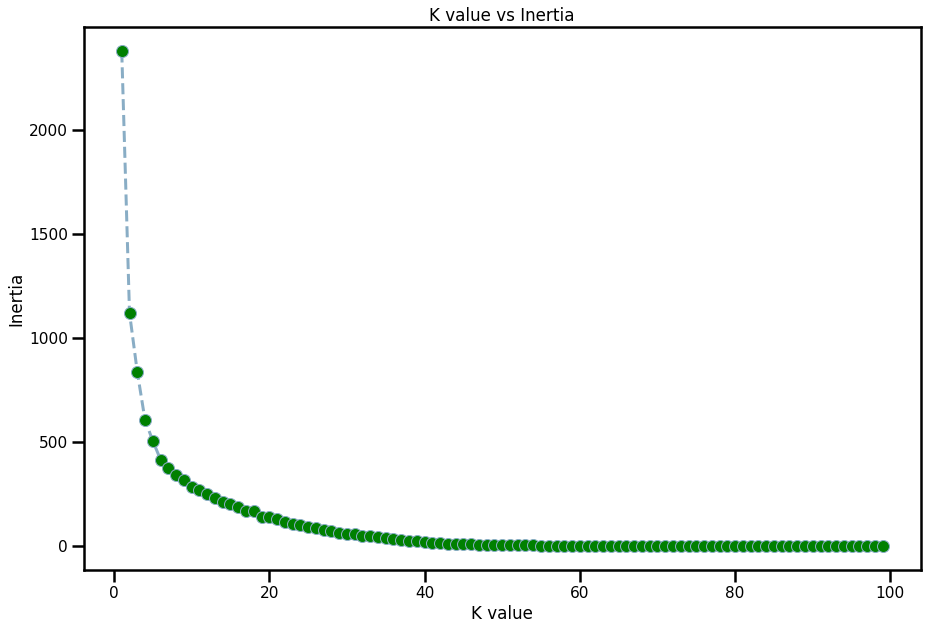

In [133]:
# Scaling with Robust Scaler
rfm_model = rfmSeg[['R_Quartile', 'F_Quartile', 'M_Quartile']]
standar = RobustScaler()
standar.fit(rfm_model)
rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=['R_Quartile', 'F_Quartile', 'M_Quartile'])
rfm_model['SellerId'] = rfmSeg.index

# Find K best with Elbow Method
# Modeling with KMean
inertia_list = []

for i in range(1, 100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[['R_Quartile', 'F_Quartile', 'M_Quartile']])
    inertia_list.append(kmeans.inertia_)
    
# Show graph elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,100), inertia_list, marker='o', markerfacecolor='green', linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [134]:
# Create clusters
kmeans = KMeans(n_clusters=7).fit(rfm_model[['R_Quartile', 'F_Quartile', 'M_Quartile']])
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.20455154 -0.40481928 -0.33413655]
 [ 0.70617284  0.41746032  0.3633157 ]
 [-0.44444444 -0.96491228 -0.82873851]
 [ 0.65071225 -0.00897436 -0.16980057]
 [-0.1897514   0.21575342  0.19989853]
 [ 0.15482149 -0.93843844 -0.7967968 ]
 [ 0.69923996 -0.53908795 -0.52696345]]


57


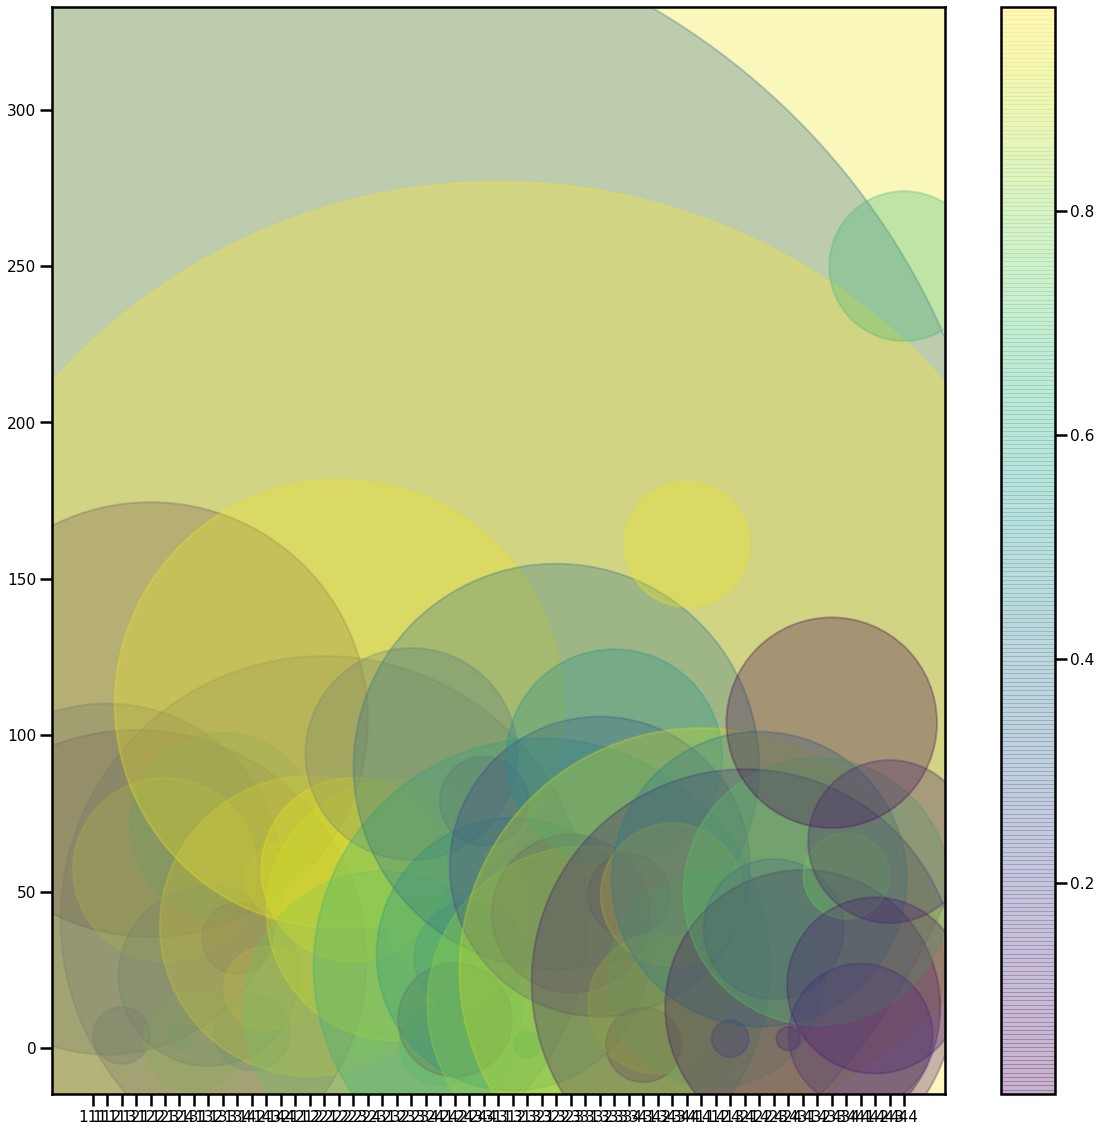

In [120]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(57)
sizes = 1000 * rng.rand(100)
print(len(sellerSegmentation['RFMClass'].values))
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(sellerSegmentation['RFMClass'].values, sellerSegmentation['ClassName'].values, c=colors, \
            s=sellerSegmentation['MonetaryValue'].values, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # show color scale

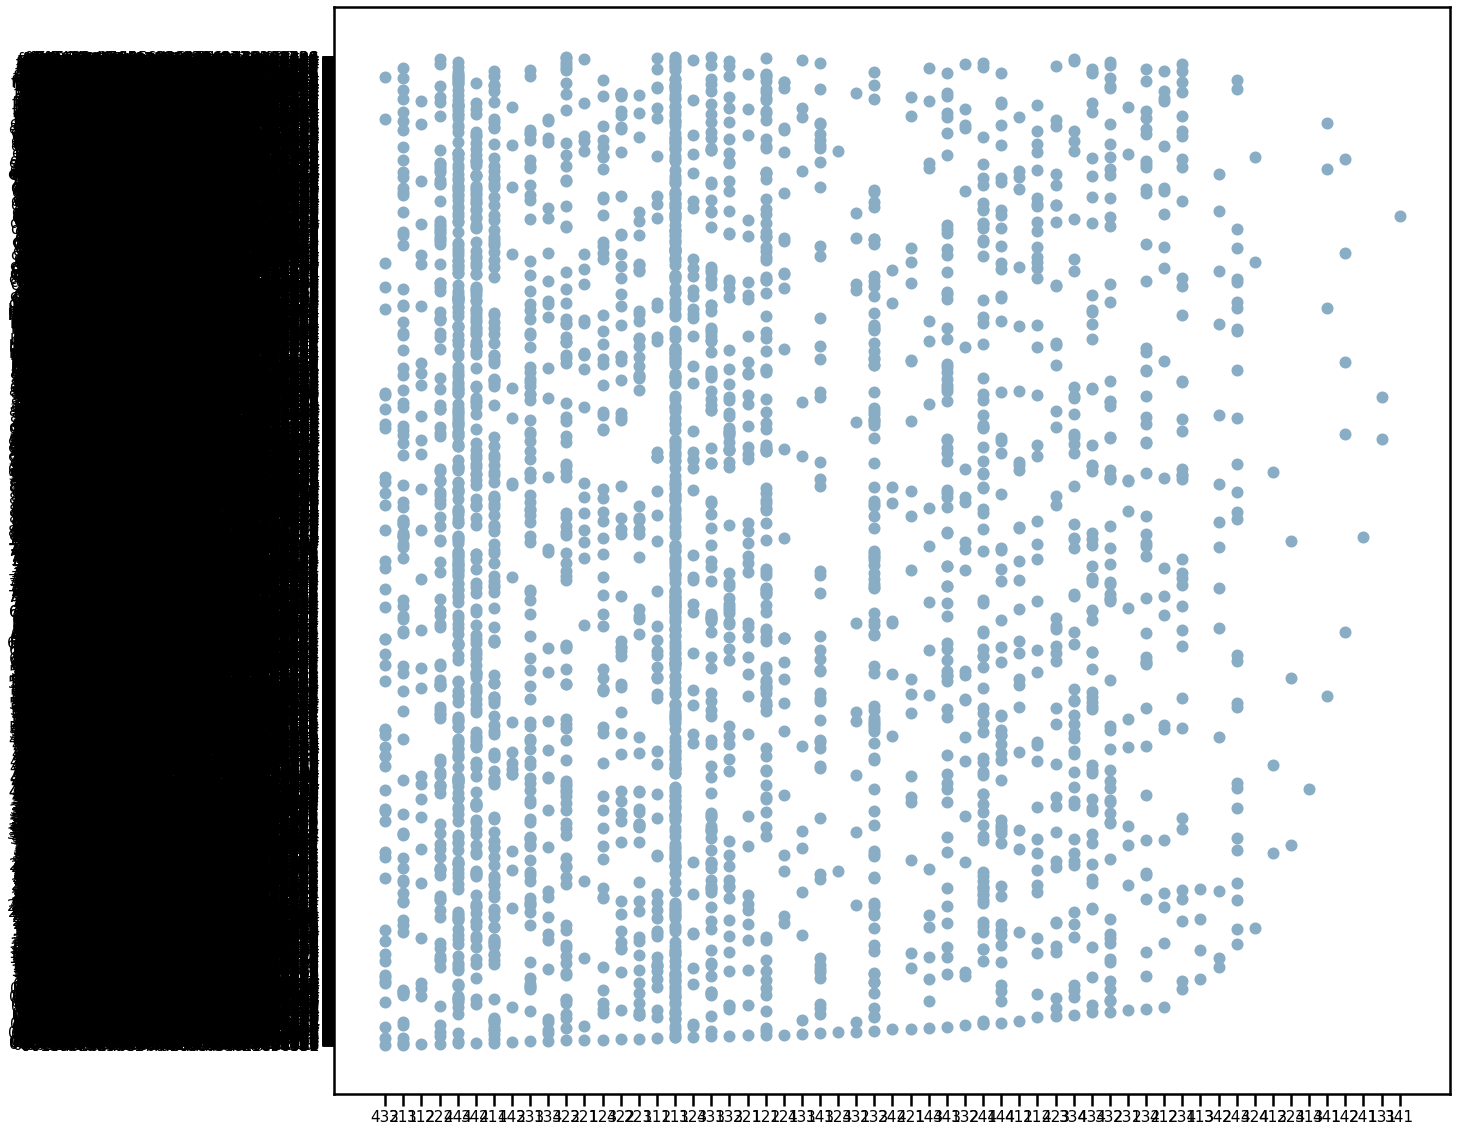

In [121]:
plt.scatter(rfmSeg['RFMClass'].values,
            rfmSeg['SellerID'].values, s=100)

In [64]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     20386.837666
4     10693.265936
5      7211.715596
6      3043.014806
7      1953.861216
8      1069.645873
9       627.790909
10      364.818849
11      175.355603
12       89.789000
Name: monetary_value, dtype: float64

<AxesSubplot:xlabel='Total Score'>

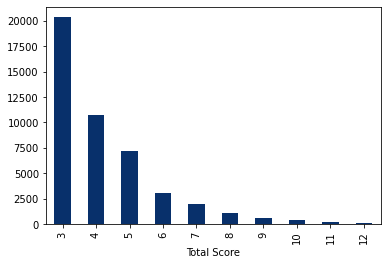

In [65]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

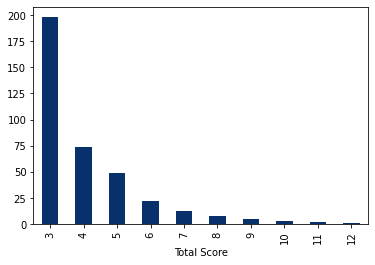

In [66]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

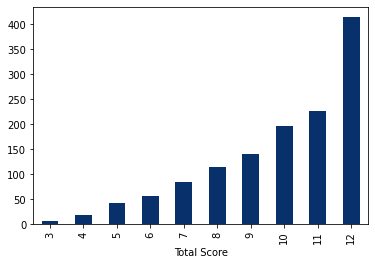

In [67]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(
    kind='bar', colormap='Blues_r')

<AxesSubplot:xlabel='Total Score'>

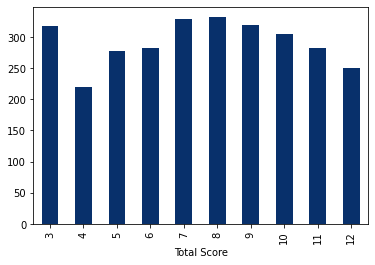

In [69]:
rfmSeg.reset_index().groupby('Total Score').agg('seller_id').count().plot(
    kind='bar', colormap='Blues_r')

In [71]:
rfmSeg['RFMClass'].value_counts()

111    317
444    250
344    161
211    137
222    110
122    105
433    104
233     94
333     93
322     90
311     86
244     79
133     71
443     66
332     58
223     57
123     57
434     55
144     54
112     54
422     54
432     50
334     49
343     49
232     44
323     43
221     41
212     39
423     38
234     37
134     35
312     30
243     29
121     28
321     26
411     25
132     23
412     22
421     21
442     20
143     19
331     14
342     14
431     13
231     12
242      9
142      5
441      4
113      4
124      3
224      3
424      3
413      3
131      2
313      1
241      1
341      1
Name: RFMClass, dtype: int64

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Days since last sale')

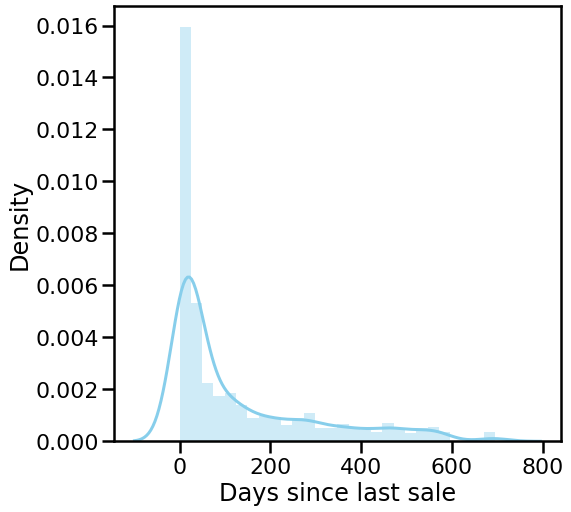

In [74]:
# Plotting for the last day since the seller made a sale:

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.set_palette(['skyblue'])
sns.distplot(rfmSeg['recency'])
plt.xlabel('Days since last sale')

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency', ylabel='Density'>

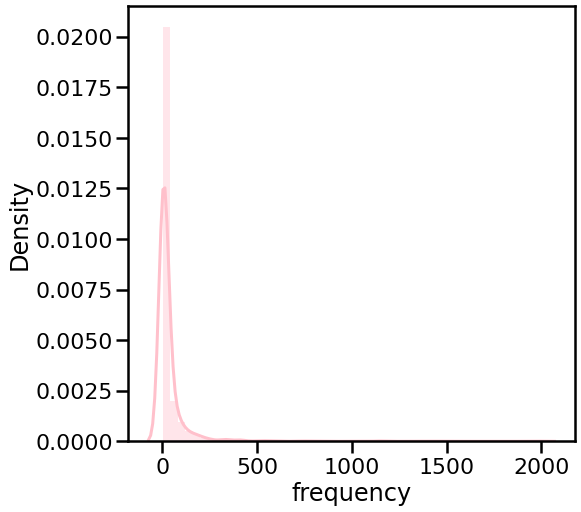

In [75]:
# Plotting the number of times the sellers has made a sale:

plt.figure(figsize=(8, 8))
sns.set_context("poster")
sns.set_palette(['pink'])
sns.distplot(rfmSeg['frequency'])

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Money')

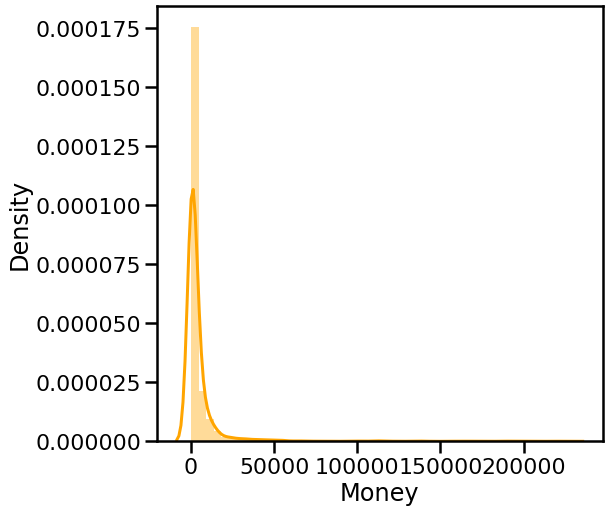

In [77]:
# Plotting the total income that the particular seller has:

plt.figure(figsize=(8, 8))
sns.set_context("poster")
sns.set_palette(['orange'])
sns.distplot(rfmSeg['monetary_value'])
plt.xlabel('Money')

In [79]:
# Making a copy so that I don't lose my temper over messing up a previously perfect dataframe.
from sklearn.cluster import KMeans
RFM = rfmSeg.copy()

# Importing KMeans and finding clusters:

km = KMeans(n_clusters=4, init='k-means++')

nclusters = km.fit_predict(RFM)

clusters = pd.DataFrame(nclusters, columns=['clusters'], index=RFM.index)

# Concatenating the clusters with the RFM dataframe:
rfmK = pd.concat([RFM, clusters], axis=1)

<AxesSubplot:xlabel='frequency', ylabel='monetary_value'>

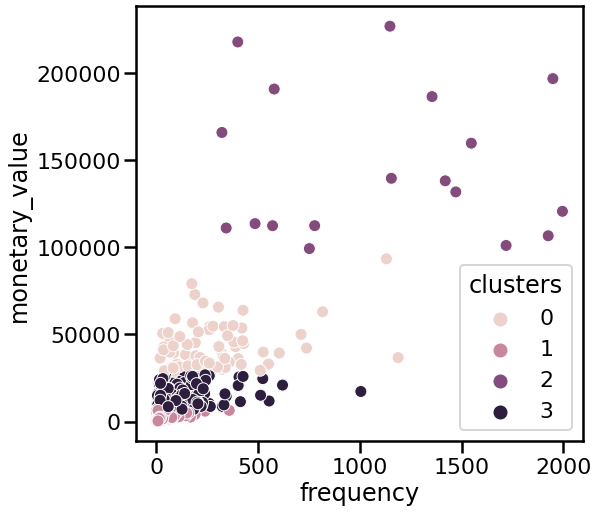

In [81]:
# Lets take a look at the clusters:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=rfmK, x='frequency', y='monetary_value', hue='clusters')

In [82]:
RFMKMEANS = rfmK.copy()

RFMKMEANS['clusters'] = ['SuperFans' if x ==
                         3 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['UsualCustomers' if x ==
                         2 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['FrequentCustomers' if x ==
                         0 else x for x in RFMKMEANS['clusters']]
RFMKMEANS['clusters'] = ['Thrifters' if x ==
                         1 else x for x in RFMKMEANS['clusters']]

C:\ProgramData\Anaconda3\envs\py3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clusters', ylabel='count'>

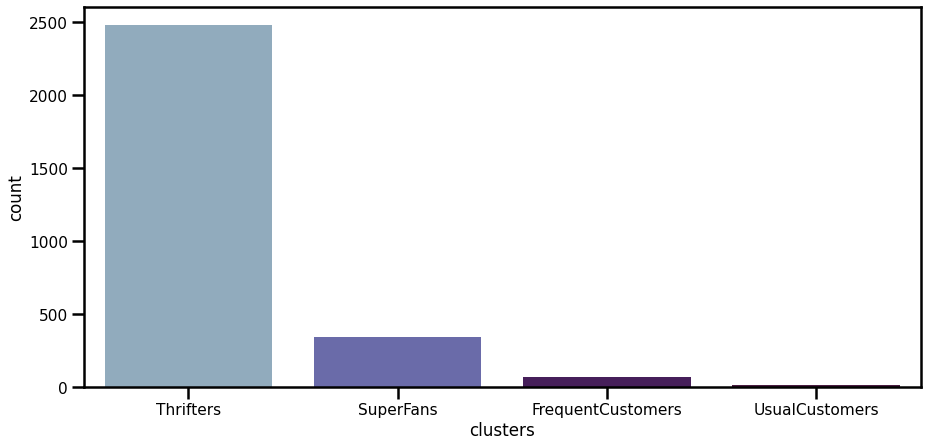

In [83]:
plt.figure(figsize=(15, 7))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(RFMKMEANS['clusters'])

### Группировка топ 5 продавцов по количеству продаж в разрезе категорий 

In [ ]:
sellers_by_category = df_sellers_analize.groupby(['seller_id', 'product_category_name_english'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [ ]:
plt.subplots(figsize=(12, 12))
sns.barplot(y='seller_id', x='num_orders', hue='product_category_name_english', 
            data=sellers_by_category[sellers_by_category['seller_id'].isin(top5_sellers)])
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Количество заказов')
plt.title('Топ5 продавцов в разрезе категорий')
plt.legend(loc=4)
plt.show()
# sellers_by_category

Пока неинформативно!

### Посчитаем сумму доходов топ продавцов по категориям

In [ ]:
sellers_income_by_category = df_sellers_analize.groupby(['seller_id', 'product_category_name_english'], as_index=False)['price'].sum(). \
                reset_index(drop=True). \
                rename(columns={'price': 'sum_income'}). \
                sort_values(by=['sum_income'], ascending=False, ignore_index=True)

In [ ]:
sellers_income_by_category

In [ ]:
sellers_income_by_category[sellers_income_by_category['seller_id'] == '4869f7a5dfa277a7dca6462dcf3b52b2']

In [ ]:
sellers_income[sellers_income['seller_id'] == '4869f7a5dfa277a7dca6462dcf3b52b2']

In [ ]:
sellers_income_by_category.to_csv('sellers_income_by_category.csv')

In [ ]:
plt.subplots(figsize=(15, 10))
sns.barplot(y='seller_id', x='sum_income', hue='product_category_name_english', 
            data=sellers_income_by_category[sellers_income_by_category['seller_id'].isin(top5_best_sellers)])
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Объем оборота')
plt.title('Топ5 продавцов в разрезе категорий')
plt.legend(loc=4)
plt.show()

In [ ]:
sellers_income_by_category.head()

In [ ]:
sellers_by_category.head()

In [ ]:
sellers_income_by_category.to_csv('TEST2.tsv', sep='\t', decimal=',')

Анализ топ 10 городов по продажам, в котором смотрим на топ10 продавцов

In [ ]:
best_cities_by_orders = df_sellers_analize.groupby(['seller_city'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [ ]:
top10_cities = best_cities_by_orders.iloc[:10, 0].tolist()

In [ ]:
city_by_cellers = df_sellers_analize.groupby(['seller_city', 'seller_id'])['order_id'].count().reset_index(). \
    rename(columns={'order_id': 'num_orders'}).sort_values(by=['num_orders'], ascending=False, ignore_index=True)

In [ ]:
city_by_cellers = city_by_cellers[city_by_cellers['seller_city'].isin(top10_cities)].reset_index(drop=True)

In [ ]:
best_cities_and_cellers = city_by_cellers[city_by_cellers['seller_id'].isin(top10_sellers)]

In [ ]:
best_cities_and_cellers.head()

In [ ]:
plt.subplots(figsize=(12, 12))
sns.barplot(y='seller_id', x='num_orders', hue='seller_city', 
            data=best_cities_and_cellers)
plt.ylabel('Seller_ID')
plt.xticks(rotation=0)
plt.xlabel('Количество заказов')
plt.title('Топ10 продавцов в разрезе топ городов по продажам')
plt.legend(loc=4)
plt.show()

In [ ]:
# orders_filtering = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id']

In [ ]:
# orders_filtering

In [ ]:
# my_filter = orders_count[orders_count['order_id'] < 50].sort_values('seller_id')['seller_id'].str.startswith('ff')

In [ ]:
# orders_filtering[my_filter].count()

In [ ]:
# orders_count[orders_count['seller_id'].str.startswith('ff')]

In [ ]:
# orders_count[orders_count['seller_id'].str.startswith('ff')].count()